In [12]:
from lsmulator import *
from workloads import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *
from bloom_assignments import *

def compare_cache_improvements(wl, cs=100, dM=1, **kwargs):
  queries = wl.queries
  t1 = LSMulator.emulate(queries, cache_size=cs, **kwargs)
  t2 = LSMulator.emulate(queries, cache_size=cs+dM, **kwargs)
  return t1.disk_accesses - t2.disk_accesses, t1.bigger_cache_savings(dM=dM)

def compare_memtbl_improvements(wl, ms=100, dM=1, **kwargs):
  queries = wl.queries
  t1 = LSMulator.emulate(queries, memtbl_size=ms, **kwargs)
  t2 = LSMulator.emulate(queries, memtbl_size=ms+dM, **kwargs) 
  return t1.disk_accesses - t2.disk_accesses, t1.bigger_memtbl_savings(dM=dM)

def compare_bloom_improvements(wl, bs=100, dM=1, ballocs=monkey_assignment, **kwargs):
  queries = wl.queries
  t = LSMulator.emulate(queries, **kwargs)
  b1 = ballocs(bs, t.memtbl.size, t.layer_sizes)
  b2 = ballocs(bs+dM, t.memtbl.size, t.layer_sizes)
  t1 = LSMulator.emulate(queries, bloom_size=b1, **kwargs)
  t2 = LSMulator.emulate(queries, bloom_size=b2, **kwargs)
  return t1.disk_accesses - t2.disk_accesses, t1.bigger_bloom_savings(dM=dM, ballocs=ballocs)

def plot_savings(savings, wl, component):
  lim = max(abs(savings.min()), abs(savings.max()))
  plt.xlim(-lim, lim)
  plt.hist(savings[:,0], bins=8, alpha=0.5, label='Simulated')
  plt.hist(savings[:,1], bins=8, alpha=0.5, label='Predicted')
  plt.axvline(savings[:,1].mean(), label='Pred. Avg.', lw=3, color='green')
  plt.axvline(savings[:,0].mean(), ls='--', label='Sim. Avg.', lw=3, color='blue')

  plt.legend(loc='best', fontsize=8)
  plt.xlabel('I/Os Saved with Bigger ' + component)
  plt.ylabel('Frequency')
  plt.title(component + ' Savings Estimation for\n' + wl.title())

In [2]:
import pickle
c1,c2,c3 = pickle.load(open('./cache_savings.pkl', 'rb'))
b1,b2,b3 = pickle.load(open('./bloom_savings.pkl', 'rb'))
m1,m2,m3 = pickle.load(open('./memtbl_savings.pkl', 'rb'))

In [ ]:
c1 = np.array([compare_cache_improvements(ZipfWorkload()) for _ in range(250)])
c2 = np.array([compare_cache_improvements(UniformWorkload()) for _ in range(250)])
c3 = np.array([compare_cache_improvements(DiscoverDecayWorkload()) for _ in range(250)])

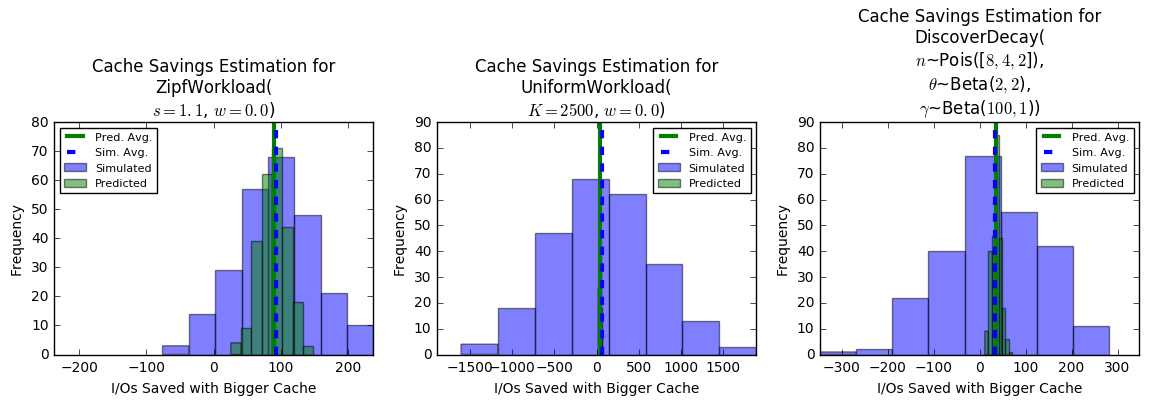

In [10]:
plt.figure(figsize=(14,3))
plt.subplot(131)
plot_savings(c1, ZipfWorkload(), 'Cache')
plt.subplot(132)
plot_savings(c2, UniformWorkload(), 'Cache')
plt.subplot(133)
plot_savings(c3, DiscoverDecayWorkload(), 'Cache')
plt.show()

In [13]:
m1 = np.array([compare_memtbl_improvements(ZipfWorkload()) for _ in range(250)])
m2 = np.array([compare_memtbl_improvements(UniformWorkload()) for _ in range(250)])
m3 = np.array([compare_memtbl_improvements(DiscoverDecayWorkload()) for _ in range(250)])

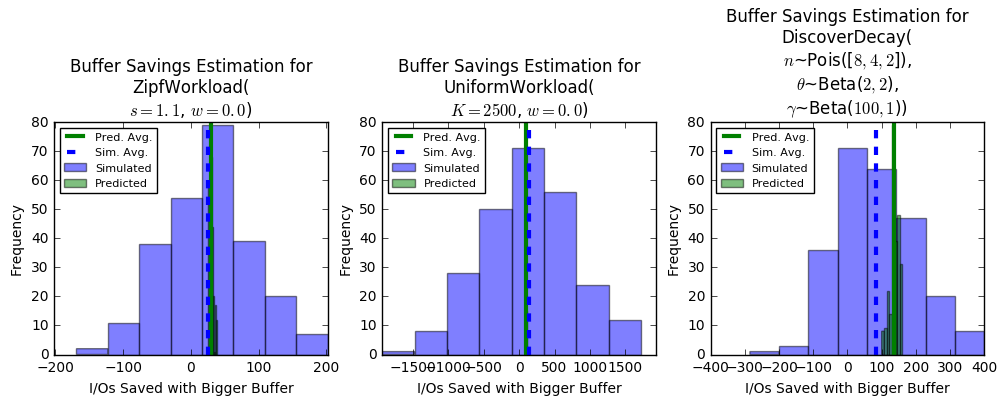

In [14]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plot_savings(m1, ZipfWorkload(), 'Buffer')
plt.subplot(132)
plot_savings(m2, UniformWorkload(), 'Buffer')
plt.subplot(133)
plot_savings(m3, DiscoverDecayWorkload(), 'Buffer')
plt.show()

In [ ]:
b1 = np.array([compare_bloom_improvements(ZipfWorkload()) for _ in range(250)])
b2 = np.array([compare_bloom_improvements(UniformWorkload()) for _ in range(250)])
b3 = np.array([compare_bloom_improvements(DiscoverDecayWorkload()) for _ in range(250)])

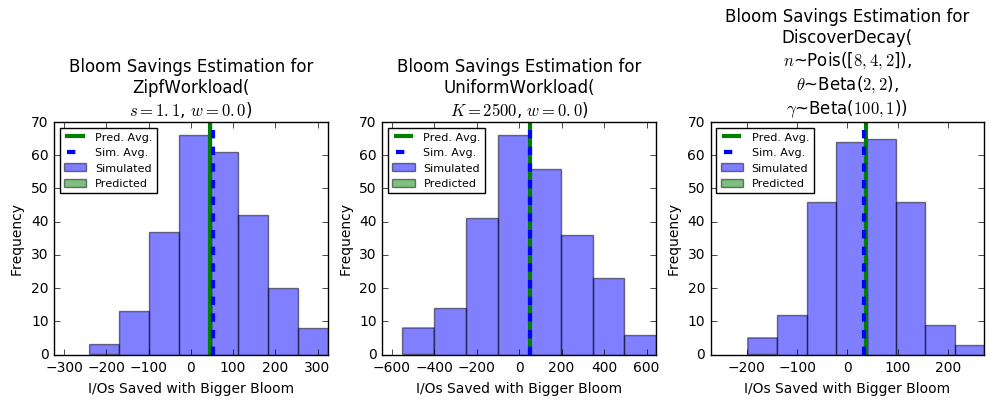

In [14]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plot_savings(b1, ZipfWorkload(), 'Bloom')
plt.subplot(132)
plot_savings(b2, UniformWorkload(), 'Bloom')
plt.subplot(133)
plot_savings(b3, DiscoverDecayWorkload(), 'Bloom')
plt.show()

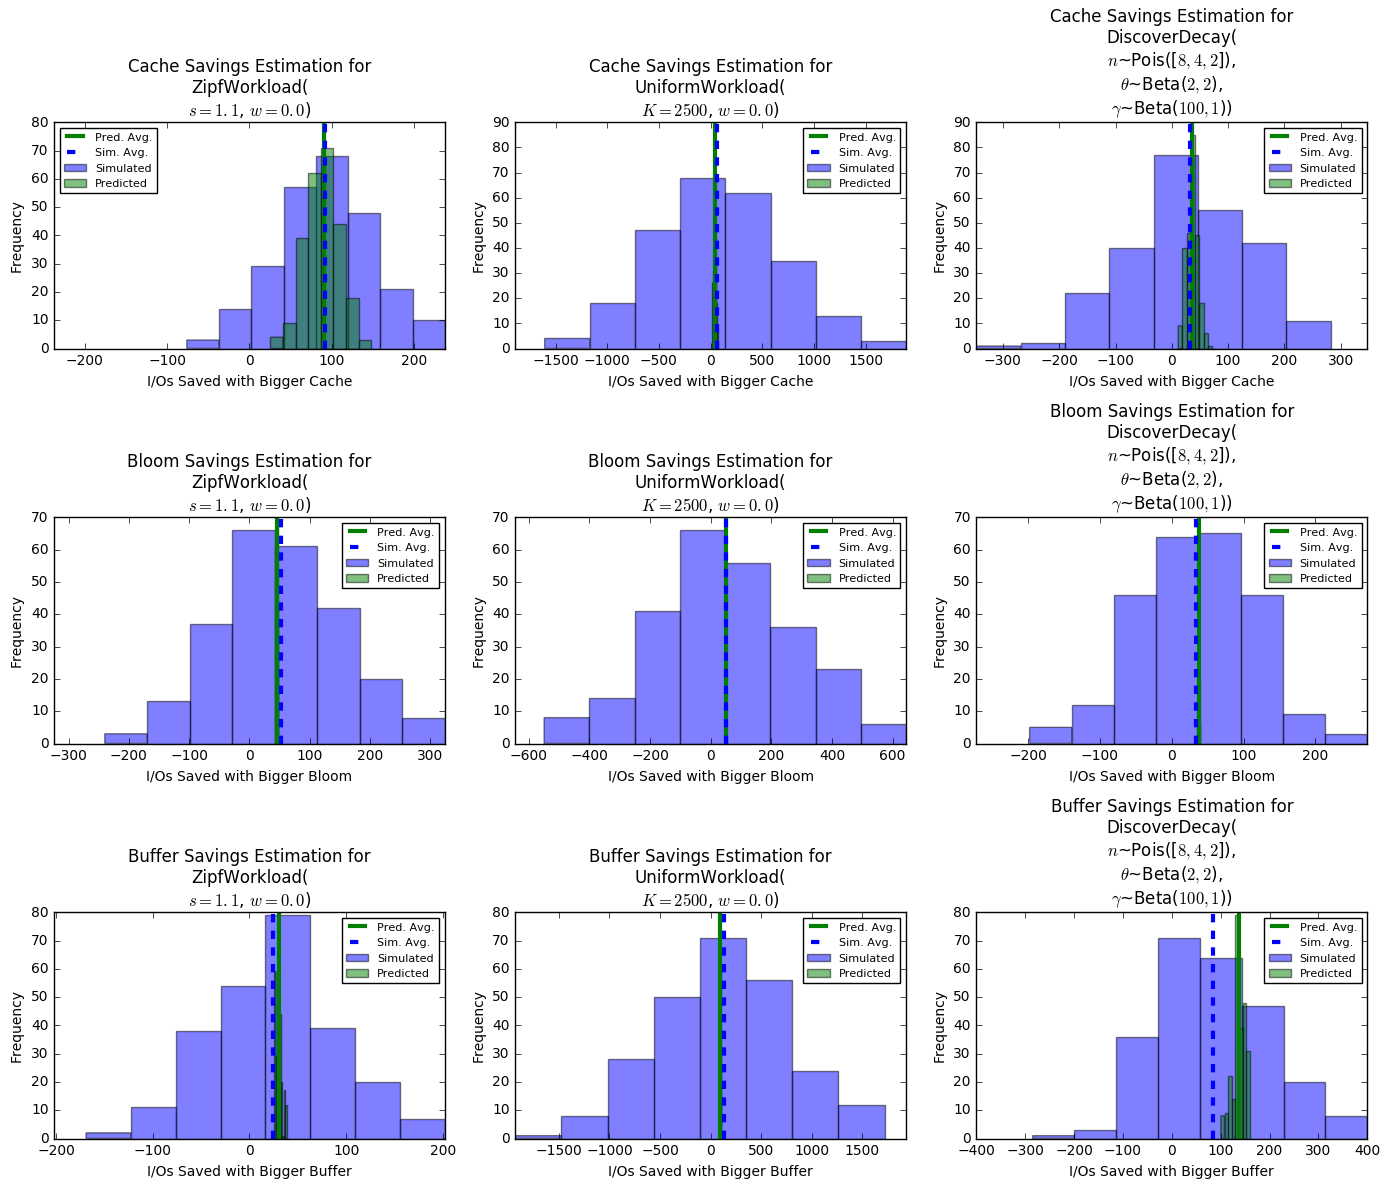

In [21]:
with figure_grid(3,3, rowwidth=14, rowheight=4) as g:
  g.next(); plot_savings(c1, ZipfWorkload(), 'Cache')
  g.next(); plot_savings(c2, UniformWorkload(), 'Cache')
  g.next(); plot_savings(c3, DiscoverDecayWorkload(), 'Cache')
  
  g.next(); plot_savings(b1, ZipfWorkload(), 'Bloom')
  g.next(); plot_savings(b2, UniformWorkload(), 'Bloom')
  g.next(); plot_savings(b3, DiscoverDecayWorkload(), 'Bloom')
  
  g.next(); plot_savings(m1, ZipfWorkload(), 'Buffer')
  g.next(); plot_savings(m2, UniformWorkload(), 'Buffer')
  g.next(); plot_savings(m3, DiscoverDecayWorkload(), 'Buffer')